In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
matches = pd.read_csv('matches.csv')
matches.head(-5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,4/18/2008,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,4/19/2008,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,4/19/2008,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,4/20/2008,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,4/20/2008,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,568,2016,Kanpur,5/19/2016,Kolkata Knight Riders,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,6,DR Smith,Green Park,AK Chaudhary,CK Nandan,NaN
568,569,2016,Raipur,5/20/2016,Sunrisers Hyderabad,Delhi Daredevils,Delhi Daredevils,field,normal,0,Delhi Daredevils,0,6,KK Nair,Shaheed Veer Narayan Singh International Stadium,A Nand Kishore,BNJ Oxenford,NaN
569,570,2016,Visakhapatnam,5/21/2016,Kings XI Punjab,Rising Pune Supergiants,Kings XI Punjab,bat,normal,0,Rising Pune Supergiants,0,4,MS Dhoni,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,HDPK Dharmasena,Nitin Menon,NaN
570,571,2016,Kanpur,5/21/2016,Mumbai Indians,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,6,SK Raina,Green Park,AK Chaudhary,CK Nandan,NaN


In [3]:
matches.shape

(577, 18)

In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               577 non-null    int64  
 1   season           577 non-null    int64  
 2   city             570 non-null    object 
 3   date             577 non-null    object 
 4   team1            577 non-null    object 
 5   team2            577 non-null    object 
 6   toss_winner      577 non-null    object 
 7   toss_decision    577 non-null    object 
 8   result           577 non-null    object 
 9   dl_applied       577 non-null    int64  
 10  winner           574 non-null    object 
 11  win_by_runs      577 non-null    int64  
 12  win_by_wickets   577 non-null    int64  
 13  player_of_match  574 non-null    object 
 14  venue            577 non-null    object 
 15  umpire1          577 non-null    object 
 16  umpire2          577 non-null    object 
 17  umpire3         

# Feature Engineering

We can see that there are 3-3 missing values in the 'winner' & 'player_of_match' column. And 7 missing values in the 'City' Column. Also the Column of 'Umpire3' is completely missing.

In [5]:
#Handling Missing Values
#Finding all missing values in winner column
matches[pd.isnull(matches['winner'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
241,242,2011,Delhi,5/21/2011,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
486,487,2015,Bangalore,4/29/2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
511,512,2015,Bangalore,5/17/2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN


In [6]:
#Filling the missing values with result as Draw
matches['winner'].fillna('Draw', inplace=True)

In [7]:
#Find cities which are null
matches[pd.isnull(matches['city'])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
402,403,2014,NaN,4/19/2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
403,404,2014,NaN,4/19/2014,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
407,408,2014,NaN,4/23/2014,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
409,410,2014,NaN,4/25/2014,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
410,411,2014,NaN,4/25/2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
415,416,2014,NaN,4/28/2014,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
417,418,2014,NaN,4/30/2014,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [8]:
#Filling the city column with the correct city-name
matches['city'].fillna('Dubai',inplace=True)

In [9]:
matches.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers',
                 'Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW'],inplace=True)
matches.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,4/18/2008,KKR,RCB,RCB,field,normal,0,KKR,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,4/19/2008,CSK,KXIP,CSK,bat,normal,0,CSK,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,4/19/2008,RR,DD,RR,bat,normal,0,DD,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN


In [10]:
#Encoding the team names(categorical variables) in the form of Numerical Variables
encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}}
matches.replace(encode, inplace=True)

matches.head(3)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,4/18/2008,2,3,3,field,normal,0,2,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,4/19/2008,5,9,5,bat,normal,0,5,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,4/19/2008,6,7,6,bat,normal,0,7,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN


Since their are many columns which are not so useful in predicting the winner of new season. Hence we will not take those columns for further Analysis.

In [11]:
#Taking only relevant columns 
matches = matches[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
matches.head()

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,3,Bangalore,field,3,M Chinnaswamy Stadium,2
1,5,9,Chandigarh,bat,5,"Punjab Cricket Association Stadium, Mohali",5
2,6,7,Delhi,bat,6,Feroz Shah Kotla,7
3,1,3,Mumbai,bat,1,Wankhede Stadium,3
4,4,2,Kolkata,bat,4,Eden Gardens,2


In [12]:
df = pd.DataFrame(matches)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   team1          577 non-null    int64 
 1   team2          577 non-null    int64 
 2   city           577 non-null    object
 3   toss_decision  577 non-null    object
 4   toss_winner    577 non-null    int64 
 5   venue          577 non-null    object
 6   winner         577 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 31.7+ KB


In [13]:
df['city'].nunique()

31

In [14]:
df['venue'].nunique()

35

As we can see their are differences between the unique values of 'city' & 'venue'. Hence it implies that their are more than one stadiums in some cities. 
for example- DY Patil stadium,Wankhede Stadium & Brabourne Stadium are 3 cricket stadiums in Mumbai.
Hence we can drop the City Column.

In [15]:
df.drop(['city'],axis=1,inplace=True)
df.head()

,team1,team2,toss_decision,toss_winner,venue,winner
0,2,3,field,3,M Chinnaswamy Stadium,2
1,5,9,bat,5,"Punjab Cricket Association Stadium, Mohali",5
2,6,7,bat,6,Feroz Shah Kotla,7
3,1,3,bat,1,Wankhede Stadium,3
4,4,2,bat,4,Eden Gardens,2


In [16]:
#Encoding the categorical column 'venue' into numerical column.
cat_list=df["venue"]
encoded_data1, mapping_index1 = pd.Series(cat_list).factorize()
print(encoded_data1)
print("*"*80)
print(mapping_index1)

[ 0  1  2  3  4  5  6  7  6  1  0  7  8  1  0  4  2  6  5  7  6  1  8  5
  0  7  8  2  4  5  0  7  6  5  1  4  3  1  2  3  2  5  6  4  0  4  3  7
  1  2  7  0  4  5  6  3  3  8  9  9  9  9 10 11  9 11  9 11 11 10  9 11
 10 12 11 11 12 12 13 11 10 14 10 14 13 11 11 12 12 12 13 15 15 10 14 15
 12 12 11 11 11 16 10 14 14 16 12 14 11 11 12 12 12 14 14  8 17  1  4  7
 18  0  4  2  0  2 19 18 17 19  7 17  0  1 17 18  1  0 18  8  2 17  7  2
  4  1  7 17  4  2 20  7  5  4  0  1 20  0  2  5 20 17  7  5  7 21  0  4
 21  2  4  8  8  8  8  7  6 22  2  8  4  5  0  1  8  6  5  3  7  6  8  4
 22  2  3  4  1  3  4  2  6  5  7  2  8 22  2  5  0 22  4  5  7  3  2  6
  7  8 22  6  0  4  3  0  1  5  6  1  5  7 23  0  3 21 23  8 21  7  8  3
 21  2  0  4  3  3  7  7  7  4  3  5  0 24  5 25 24  0  2  3  7  1  4  2
 25  4  0  3  5  0  1  6  7  1  7  2  3 19  5 25  1 25  2  7  4  2  3  7
 19  5  0 25  7  4  1  3  0  2 25  6  3  5 25  4  7  5  1  0  4  2  3 21
  2  6 21 25  6  5 25  0  7  7  4  0  6  2  7 25  6

In [17]:
#Encoding the categorical column 'toss_decision' into numerical variables
cat_list2=df["toss_decision"]
encoded_data2, mapping_index2 = pd.Series(cat_list2).factorize()
#print(encoded_data2)
print(mapping_index2)

Index(['field', 'bat'], dtype='object')


In [18]:
#building predictive model , convert categorical to numerical data
from sklearn.preprocessing import LabelEncoder
var_mod = ['toss_decision','venue']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
df.head(10)

,team1,team2,toss_decision,toss_winner,venue,winner
0,2,3,1,3,14,2
1,5,9,0,5,22,5
2,6,7,0,6,8,7
3,1,3,0,1,34,3
4,4,2,0,4,7,2
5,9,6,0,9,26,6
6,4,7,0,4,23,7
7,5,1,1,1,15,5
8,4,6,1,6,23,6
9,9,1,1,1,22,9


# Exploratory Data Analysis

<AxesSubplot:>

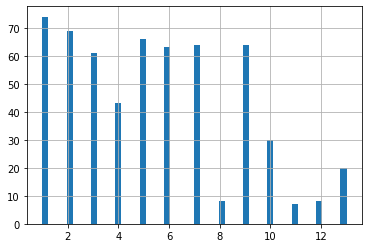

In [19]:
df['toss_winner'].hist(bins=50)

Above Figure shows that MI(1) won most number of toss followed by KKR(2).

<AxesSubplot:>

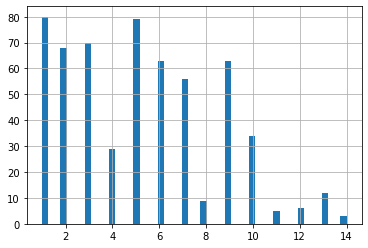

In [20]:
df['winner'].hist(bins=50)

Above Figure shows that MI(1) won most matches followed by CSK(5). RCB(3) & KKR(2) have third and fourth most wins as teams.

In [21]:
temp1=df['toss_winner'].value_counts(sort=True)
temp2=df['winner'].value_counts(sort=True)

Text(0.5, 1.0, 'Match winners')

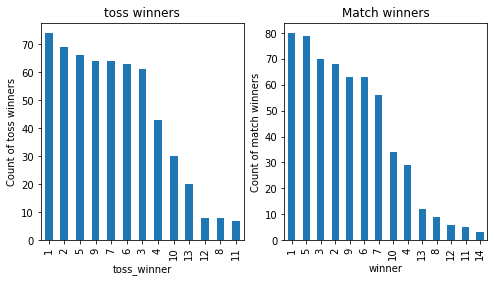

In [22]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('toss_winner')
ax1.set_ylabel('Count of toss winners')
ax1.set_title("toss winners")
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('winner')
ax2.set_ylabel('Count of match winners')
ax2.set_title("Match winners")

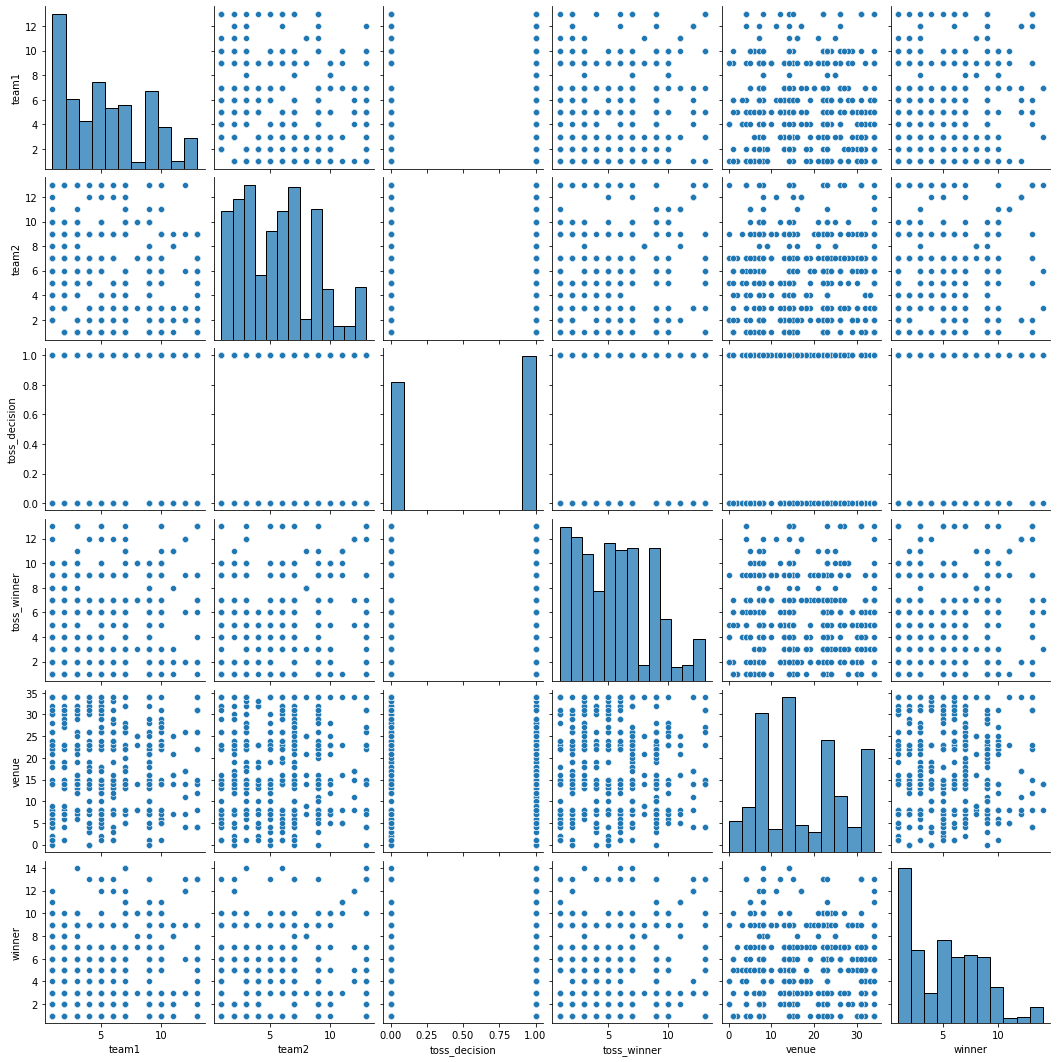

In [23]:
sns.pairplot(df)

# Model Building & Comparison of Models

In [24]:
#Importing libraries for models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [25]:
#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
       model.fit(data[predictors],data[outcome])
       predictions = model.predict(data[predictors])
       print(predictions)
       accuracy = metrics.accuracy_score(predictions,data[outcome])
       print('Accuracy : %s' % '{0:.3%}'.format(accuracy))

I have built a function called 'classification_model' and stored 4 arguments in it. I will use this function later in every model to call the arguments.

In [26]:
df.head(3)

,team1,team2,toss_decision,toss_winner,venue,winner
0,2,3,1,3,14,2
1,5,9,0,5,22,5
2,6,7,0,6,8,7


1) Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','toss_decision']
model =LogisticRegression()
classification_model(model, df,predictor_var,outcome_var)

[ 1  5  5  1  2  6  5  2  3  9  3  5  2  9  5  2  2  6  1  5  1  6  3  5
  3  3  2  3  2  3  1  9  1  6  5  5  1  9  2  1 10  3  1  5  3  3  6  5
  6  3  5  3  5  1  5  6  6  3  1  5  9  1  1  2  1  5  3  5  1  5  5  3
  1  6  1  2  6  6  2  5  6  3  5  1  2  9  5  1  1  6  5  3  5  1  3  5
  1  6  3  5  2  9  1  1  9  5  1  5  2  5  1  1  6  3  1  2  5  9  2  5
  6  5  2  3  2  5  3  1  2  5  9  2  3  9  2  5  5  2  5  2  2  2  5  5
  2  6  5  2  5  5  6  1  6  5  3  5  1  1 10  1  1  5  5  1  5  9  1  2
  9  5  2  2  5  2  2  1  3  6  2 10  2  6  1  6 10  1  1  6  5  6  9  2
  9  5  6  9  9  1  2  9  1  9  9  2 10  9  3  1  7 10  2  9  5  1  9  1
  5  5  9  3  3  2  1  5 10  6  9  9  3  5  9  1  1  9  9  9  5 10  9  1
  3 10  3  2  1  1  1  5  2  3  9  6  3  2  1 10  2  1  3  1  5  9  2  5
  9  2  5  1  5  6  6  5  9  9  5  9  6  2  1  6  6  9  2  5  2  5  1  1
 10  6  3  9  5  7  5  1  3  2  6  9  1  6  6  2  9  9  5  1  3 10  1  3
  3  5  9  9  1  1  5  2  3  1  2  1  9  5  5 10  5

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic regression model gives a poor accuracy of 28%.

2) Naive Bayes Classifier

In [28]:
from sklearn.naive_bayes import GaussianNB
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','toss_decision']
model = GaussianNB() 
classification_model(model, df,predictor_var,outcome_var)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[12  5  5  1  2  6  5 12 12 12 12  5 12  5  5  2 12 12  5  5  5  6 12  5
 12 12 12 12  2 12 12 12  1 12  5  2 12 12 12 12  5 12 12  2 12 12 12  5
 12 12  5 12  2 12  5 12  6 12 12  5 12  1  6 12  5  5 12  5  2  1  6 12
  1  6  2  2 12 12  2  5  6 12  1  1  5 12  5  1 12  6  2 12  5  1 12  5
 12  6 12  5  5 12  1 12 12  6  1  5 12  5 12  1 12 12 12 12  2 12 12  5
 12  6  5 12 12  5 12  5  2  5 12  2 12 12 12  5  5 12  6 12  5 12  5  5
  2  6  5  2  5  5  6  5  6  2 12  1  6 12  5 12 12  2  5  5  5 12 12  5
 12  5  2  2  5  5  2  5 12 13  2 10  2  6 12 12 13 12 12 12  5 12 12 12
 12  5 13 12 12 12 12 12 12 12 12 12 13 12 12 12 12 10 12 12  5 12 12 12
  5 12 12 12 12  5 12 13 10 12  5 12 12  5 12 12  1 12 12 12  5  5 12  1
 12 10 12 12 12 12 12  5 12 12 12 12 12 12 12 13  2 12 12 12  5 12  5  5
  9 12  5 12  5 13  6  5 12 12  5 12  1 12 12 13  6  4 12  6  2  5 12  5
  4  6 12  1  5  4  5 12 12  5 13 12 12 12 12  2 12 10  5 12 12  7 12 12
 12  5 12  1 12  5  1 12 12  5 12 12 12  5  1 13  5

3) KNN Algorithm

In [29]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
classification_model(model, df,predictor_var,outcome_var)

[ 2  5  5  1  2  6  7  5  6  9  5  5  1  6  5  1  3  9  1  5  4  1  1  6
  9  5  1  5  2  6  1  3  2  6  2  2  1  9  5  1  9  6  1  5  3  5  9  5
  9  1  5  3  2  6  3  6  1  5  1  4  9  4  2  2  4  5  3  3  3  2  7  3
  1  6  3  3  5  5  1  3  5  5  2  4  5  5  6  4  5  5  1  9  5  1  1  5
  3  1  3  3  6  9  1  4  9  7  2  3  3  5  7  3  4  3  4  1  1  9  1  3
  7  3  2  1  3  7  4  6  1  4  9  1  3  9  1  6  1  3  6  1  2  1  5  7
  2  2  5  1  2  7  2  1  6  2  3  1  2  2  9  6  3  1  5  1  5  4  1  2
  4  4  2  1  5  5  1  2  6  3  1 10  2  6  1  9 13  4  6  1  5  9  6  2
  4  4  1  2  9  1  3  9  1  6  5  3  2  3  1  6  3  5  2  6  5  1 10  1
  5  2  1  6  9  2  1  3 10  6 10  9  6  5  9  2  4  9 12  2  2  5  2  1
  4  9  3  1  5  1  1  5  5  2  9  9  3  5  6 13  1  2  7  1  5  9  2  4
  4  2  5  1  6  3  1  7  5  9  5  7  1  1  6  6  1  3  7  3  2  7  1  2
  4  5  9  2  5  2  5  1  3  2  6  3  1  6  3  2  5  6  9  1  1  7  1  4
  3  6  9  2  4  6  2  5  5  2  2  1 10  5  5 13 10

<ipython-input-25-aa83da158a31>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  model.fit(data[predictors],data[outcome])


4) Support Vector Classifiers

In [30]:
from sklearn import svm
model = svm.SVC(kernel='rbf', C=1, gamma=1)
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','toss_decision']
classification_model(model, df,predictor_var,outcome_var)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[ 3  5  6  1  2  6  7  5  6  9  6  5  1  9  5  1  3  9  6  5  3  2  1  6
  3  4  1  5  2  6  1  5  2  6  9  2  1  9  7  1  9  6  1  5  3  6  9  5
  9  1  5  3  2  6  5  6  5  6  1  3  7  4  5  2  4  7  6  3  4  7  9  4
  1  6  3  9  7  5  1  3  6  5  9  3  5  6  7  4  6  5  7  9  5  1  7  4
  3  1  7  3  6  9  5  4  9  7  2  3  2  5  7  3  4  3  4  2  1  7  2  4
  6  3  2  1  3  5  4  6  3  4  9  1  3  6  1  6  2  3  6  1  2  1  5  7
  2  3  5  1  9  7  6  5  6  2  3  1  4  3  9  6  4  1  5  3  5  4  1  2
  5  4  1  1  5  3  5  2  6  3  1 13  2  6  1  9 13  4  6 12  5  9  7  2
  5  4  1 12  9  1  3  9  1  6  5  3  5  4  2  6  3  7  2  6  5  1 12  2
  5  1 12  7  3  2  1  3 13  6 13  9  6  5  9  3  4  9 12  4  9  5  2  6
  4 14  3  1  5  1  3  5  5  7 13  6  3  5  6  9  1  3  7  1  5  9  2  4
  5  2  6  1  6  3  2  7  5  9  5 13  1  2  6  7  1  4  7  9  2  7  1  2
  4  7  3  1  5  2  6  1  3  2  6  9  1  5  3  1  5  6  9  1  5  7  1  9
  3  4  9  2  4  6  2  5  5  2  2  1 10  6  1  9 10

5) Decision Tree Algorithm

In [31]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=0)
outcome_var=['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','toss_decision']
classification_model(model, df,predictor_var,outcome_var)

[ 3  5  6  1  2  6  7  1  6  9  6  5  1  9  5  1  3  9  6  5  3  2  1  6
  3  4  1  5  2  6  1  5  2  6  9  2  1  9  7  1  9  3  1  5  3  6  9  5
  9  1  5  3  2  6  5  6  5  6  1  3  7  4  5  2  4  7  6  3  4  7  9  4
  1  6  3  9  7  5  1  3  6  5  9  3  5  6  7  4  6  5  7  9  5  1  7  4
  3  1  7  3  6  9  5  4  9  7  2  3  2  5  7  3  4  3  4  2  1  7  2  4
  6  3  2  1  3  5  4  6  3  4  9  1  3  6  1  6  2  3  6  1  2  1  5  7
  2  3  5  1  9  7  6  1  6  2  3  1  4  3  9  6  4  1  5  3  5  4  1  2
  5  4  1  1  5  3  5  2  6  3  1 13  2  6  1  9 13  4  6 12  5  9  7  2
 12  4  1 12  9  1  3  9  1  6  5  3  5  4  2  6  3  7  2  6  5  1 12  2
  5  1 12  7  3  2  1  3 13  5 13  9  3  5  9  3  4  9 12  4  9  5  2  6
  4 14  3  1  5  1  3  5  1  7 13  6  3  5  6  9  1  3  7  1  5  9  2  4
  5  2  6  1  6  3  2  7  5  3  5 13  1  2  3  7  1  4  7  9  2  7  1  2
  4  7  3  1  5  2  6  1  3  2  6  9  1  5  3  1  5  6  9  1  5  7  1  9
  3  4  9  2  4  1  2  5  5  2  2  1 10  6  1  9 10

6) Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
outcome_var = ['winner']
predictor_var = ['team1', 'team2', 'venue', 'toss_winner','toss_decision']
classification_model(model, df,predictor_var,outcome_var)

<ipython-input-25-aa83da158a31>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(data[predictors],data[outcome])


[ 3  5  7  1  2  6  7  5  6  9  6  5  4  9  5  1  3  9  6  7  3  2  1  6
  9  4  1  5  2  6  1  5  2  6  9  2  1  9  7  1  9  3  1  5  3  6  9  5
  9  1  5  4  2  6  5  6  5  6  1  3  7  4  5  2  4  7  6  9  4  7  9  4
  1  6  3  9  7  5  1  9  6  5  9  3  5  6  7  4  6  5  7  9  5  1  7  4
  3  1  7  3  6  9  5  4  9  7  2  3  2  5  7  3  4  3  4  2  1  7  2  4
  7  3  5  1  3  5  4  6  3  4  9  1  3  6  1  6  2  7  6  4  2  1  5  7
  2  3  5  1  9  7  6  5  6  2  4  1  4  3  9  6  4  1  5  3  7  4  1  2
  5  4  1  1  5  3  5  2  6  3  1 13  2  6  1  9 13  4  6 12  5  9  7  2
 12  4  1 12  9  5  3  9  1  6  5  3  5  4  2  6  3  7  2  6  5  1 12  2
  5  1 12  7  9  5  1  3 13  5 13  9  3  7  9  3  4  9 12  4  9  5  2  6
  4 14  3  1  5  1  3  5  5  7 13  6  3  5  6 13  1  3  7  1  5  9  2  4
 13  2  6  1  6  3  2  7  5  9  5 13  1  2  6  7  1  4  7  9  2  7  1  2
  4  7  9  1  5  2  6  1  3  2  6  9  1  5  3  1  5  6  9  1  5  7  1  9
  3  4  9  2  4  1  2  5  5  2  2  1 10  7  1 13 10

Now, we have used various ML algorithms and compared their accuracies. Hence, we will use it in Test dataset

In [33]:
#Loading The Test Dataset
test = pd.read_csv('test.csv')
test

,team1,team2,city,toss_winner,venue,toss_decision,date,winner
0,KXIP,MI,3,MI,3,0,11-Apr,MI
1,SRH,RR,5,RR,5,0,27-Apr,RR
2,KKR,MI,3,MI,3,0,5-May,MI
3,CSK,MI,7,CSK,7,1,7-May,MI
4,DC,CSK,22,CSK,24,1,10-May,CSK


In [34]:
test.shape

(5, 8)

In [35]:
test.drop(['date','winner','city'],axis=1,inplace=True)
test.head()

,team1,team2,toss_winner,venue,toss_decision
0,KXIP,MI,MI,3,0
1,SRH,RR,RR,5,0
2,KKR,MI,MI,3,0
3,CSK,MI,CSK,7,1
4,DC,CSK,CSK,24,1


In [36]:
test.replace(encode,inplace=True)
test.head()

,team1,team2,toss_winner,venue,toss_decision
0,9,1,1,3,0
1,10,6,6,5,0
2,2,1,1,3,0
3,5,1,5,7,1
4,4,5,5,24,1


In [37]:
output = model.predict(test)
print(output)

[1 6 1 1 5]


In [38]:
# Maintaining a dictionary for mapping teams
dicVal = encode['winner']

In [39]:
predicted_winner=[]
for i in output:
    predicted_winner.append(list(dicVal.keys())[list(dicVal.values()).index(i)])

In [40]:
ipl=pd.read_csv('test.csv')
ctr=0
k=0
total=len(ipl['winner'])
for i in ipl['winner']:
    if i==predicted_winner[k]:
        ctr=ctr+1
    k=k+1  
print(ctr)
print("Accuracy of our prediction of recent IPL is ", ctr/total)

5
Accuracy of our prediction of recent IPL is  1.0


In [41]:
predicted_winner

['MI', 'RR', 'MI', 'MI', 'CSK']

In [42]:
sub = pd.DataFrame()
sub['team1'] = ipl['team1']
sub['team2'] = ipl['team2']
sub['venue'] = ipl['venue']
sub['toss_winner'] =ipl['toss_winner']
sub['city'] = ipl['city']
sub['toss_decision'] = ipl['toss_decision']
sub['date of match']=ipl['date']
sub['actual_winner']=ipl["winner"]
sub['Predicted_winner'] = predicted_winner
sub.to_csv('ipl2.csv',index=False)

In [48]:
sub

,team1,team2,venue,toss_winner,city,toss_decision,date of match,actual_winner,Predicted_winner
0,KXIP,MI,3,MI,3,0,11-Apr,MI,MI
1,SRH,RR,5,RR,5,0,27-Apr,RR,RR
2,KKR,MI,3,MI,3,0,5-May,MI,MI
3,CSK,MI,7,CSK,7,1,7-May,MI,MI
4,DC,CSK,24,CSK,22,1,10-May,CSK,CSK


In [47]:
print("Feature importances: If we ignore teams, Venue seems to be one of important factors in determining winners followed by toss winning.")

imp_input = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print()
print(imp_input)

Feature importances: If we ignore teams, Venue seems to be one of important factors in determining winners followed by toss winning.

venue            0.290534
team2            0.276133
team1            0.231329
toss_winner      0.170716
toss_decision    0.031288
dtype: float64
